<a href="https://colab.research.google.com/github/SherlyC799/git_work/blob/master/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[r'lp.csv']),encoding='latin-1')
df.head()

Saving lp.csv to lp.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(598, 13)

<Axes: >

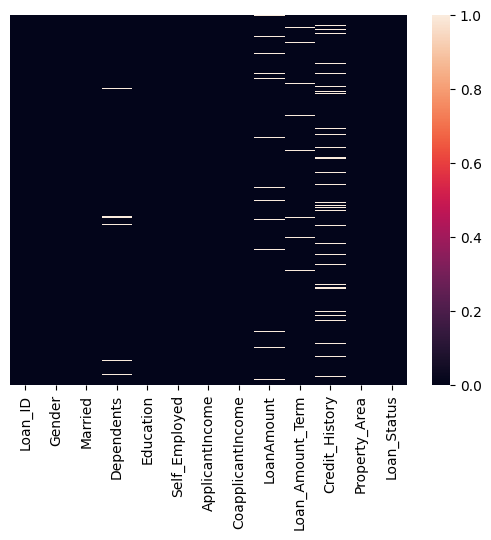

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),yticklabels=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [6]:
duplicates = df.duplicated()
print(duplicates)


0      False
1      False
2      False
3      False
4      False
       ...  
593    False
594    False
595    False
596    False
597    False
Length: 598, dtype: bool


Data Cleaning


In [7]:
df.dropna(inplace=True)

<Axes: >

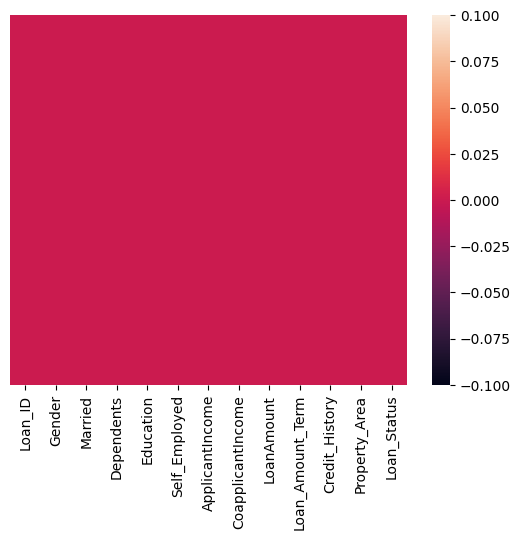

In [8]:
sns.heatmap(df.isnull(),yticklabels=False)

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['ApplicantIncome']=le.fit_transform(df['ApplicantIncome'])
df['CoapplicantIncome']=le.fit_transform(df['CoapplicantIncome'])
df['LoanAmount']=le.fit_transform(df['LoanAmount'])
df['Loan_Amount_Term']=le.fit_transform(df['Loan_Amount_Term'])
df['Credit_History']=le.fit_transform(df['Credit_History'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,258,52,78,7,1,0,0
2,1,1,1,0,0,1,118,0,24,7,1,2,1
3,2,1,1,0,1,0,76,141,70,7,1,2,1
4,3,1,0,0,0,0,318,0,91,7,1,2,1
5,4,1,1,2,0,1,294,204,161,7,1,2,1


Model Buliding

In [10]:
df.drop(['Loan_ID','Married','Education','Dependents','Credit_History'],axis=1,inplace=True)

In [11]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        76

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

